In [133]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import random
from skimage.io import imread
from PIL import Image 
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot.plotters as skplt
import warnings

warnings.filterwarnings('ignore')

In [76]:
for dirname, _,filenames in os.walk('/Users/riyajain/desktop/KaggleDatasets/appletomato'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/riyajain/desktop/KaggleDatasets/appletomato/.DS_Store
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p3_74.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p2_63.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p3_19.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p1_24.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p1_53.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p2_55.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p2_79.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p1_105.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p1_25.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p1_33.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/tomatoes/img_p3_34.jpeg
/Users/riyajain/desktop/KaggleDatasets/appletomato/test/to

In [77]:
train_folder = '/Users/riyajain/desktop/KaggleDatasets/appletomato/train'
test_folder = '/Users/riyajain/desktop/KaggleDatasets/appletomato/test'

# Loading a specific image
OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCV in matplotlib the channels will be back to front. 

OpenCv provides a function, cvtColor(), to explicitly convert the BGR image to RGB

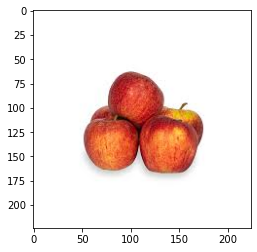

In [4]:
img = cv2.imread('/Users/riyajain/desktop/KaggleDatasets/appletomato/test/apples/img_p1_82.jpeg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_img)

# Function to plot 16 random images from the appletomato datset

In [5]:
def plot_image(folder):
    images = []
    for sub_folder in os.listdir(folder):
        for image in os.listdir(folder + '/' + sub_folder):
            images.append(os.path.join(folder, sub_folder, image))


    plt.figure(1, figsize=(15, 9))
    plt.axis('off')
    n = 0
    for i in range(16):
        n += 1
        random_img = random.choice(images)
        imgs = imread(random_img)
        plt.subplot(4, 4, n)
        plt.axis('off')
        plt.imshow(imgs)
  
    plt.show()

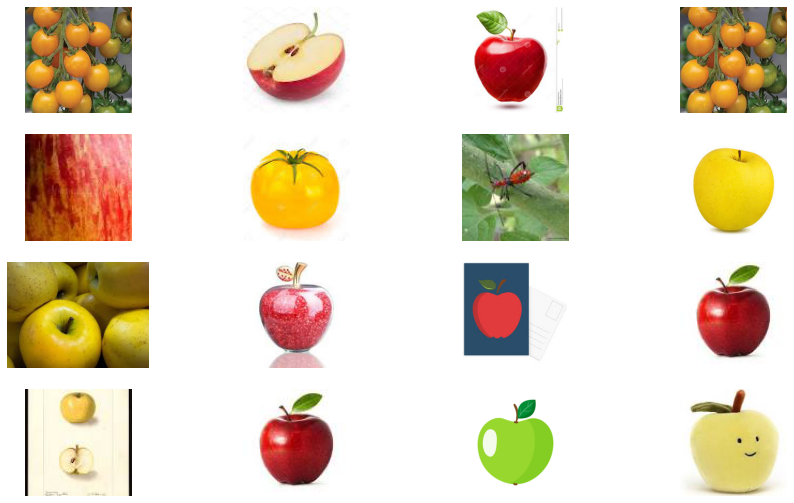

In [6]:
plot_image(train_folder)

# Function to read in data and preprocess it. 

In [115]:
def load_image(folder):
    Images, target, flat = [], [], []
    
    for file in os.listdir(folder):
        
        path = os.path.join(folder,file)
        if 'DS_STORE' in path.upper():
            continue
        for img in os.listdir(path):
            final_path = os.path.join(path, img)
            
            if '.jp' in final_path:
                image = cv2.imread(final_path)
                image = cv2.resize(image, (100,100))
                image1 = cv2.flip(image,1)
                image2 = cv2.flip(image,0)
                flat.append(image.flatten())
                target.append(file)
                flat.append(image1.flatten())
                target.append(file)
                flat.append(image2.flatten())
                target.append(file)
                #Images.append(image)
            
            
    return np.array(flat), np.array(target)

In [116]:
x, y=load_image(train_folder) #Calling the load_image function with train_folder as an argument.

# Normalizing 


In [117]:
x= x/255 

# Label Encoding


In [118]:
y = LabelEncoder().fit_transform(y)

In [119]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Training the dataset with the SVM

In [ ]:
def evaluate_features(X,y,clf=None):
    if clf is None:
        clf=LogisticRegression()
    probas = cross_val_predict(clf,X,y,cv=StratifiedKFold(n_splits=5,random_state=8),n_jobs=-1,method='predict_proba',verbose=2)
    pred_indices = np.argmax(probas,axis=1)
    classes=np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    print(classification_report(y, preds, labels=classes))

In [110]:
n_estimators = [int(x) for x in np.linspace(start = 1200, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(7, 70, num = 10)]+[None]
min_samples_split = [2, 3,9, 10]
min_samples_leaf = [1, 2, 3 ]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }

In [ ]:
svc = svm.SVC(probability = True)
rf = RandomForestClassifier()

In [111]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=1, n_jobs = -1)
rf_random.fit(x, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 135.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [7, 14, 21, 28, 35, 42, 49,
                                                      56, 63, 70, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 9, 10],
                                        'n_estimators': [1200, 1242, 1284, 1326,
                                                         1368, 1410, 1452, 1494,
                                                         1536, 1578, 1621, 1663,
                                                         1705, 1747, 1789, 1831,
                                                         1873, 1915, 1957,
                                                         2000]},
                   random_state=1, verbose=2)

In [112]:
rf_random.best_params_

{'n_estimators': 1789,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 42}

In [120]:
rf1 = rf_random.best_estimator_
evaluate_features(x,y,rf1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Log loss: 0.558457437938182
Accuracy: 0.6984126984126984
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       492
           1       0.66      0.66      0.66       390

    accuracy                           0.70       882
   macro avg       0.69      0.69      0.69       882
weighted avg       0.70      0.70      0.70       882



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.8min finished


In [125]:
def load_image_test(folder):
    Images, target, flat = [], [], []
    
    for file in os.listdir(folder):
        path = os.path.join(folder,file)
        if 'DS_STORE' in path.upper():
            continue
        for img in os.listdir(path):
            final_path = os.path.join(path, img)
            if '.jp' in final_path:
                image = cv2.imread(final_path)
                image = cv2.resize(image, (100,100))
                flat.append(image.flatten())
                Images.append(image)
                target.append(file)
            
    return np.array(flat), np.array(target)

In [126]:
x_test, y_test =load_image_test(test_folder) #Calling the load_image_test function with test_folder as an argument.
x_test = x_test/255
y_test = LabelEncoder().fit_transform(y_test)

In [167]:
x_test.shape

(97, 30000)

In [128]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
evaluate_features(x_test,y_test,rf1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Log loss: 0.6200819174826199
Accuracy: 0.711340206185567
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        54
           1       0.66      0.72      0.69        43

    accuracy                           0.71        97
   macro avg       0.71      0.71      0.71        97
weighted avg       0.72      0.71      0.71        97



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.3s finished


In [129]:
y_pred = rf_random.predict(x_test)

In [173]:
x_test

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.15294118, 0.38431373, 0.34509804, ..., 0.80784314, 0.74901961,
        0.67843137],
       [0.07843137, 0.30980392, 0.41176471, ..., 0.4627451 , 0.20784314,
        0.00784314],
       ...,
       [0.94901961, 0.94901961, 0.94901961, ..., 0.94901961, 0.94901961,
        0.94901961],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.01176471, 0.12941176, 0.06666667, ..., 0.48627451, 0.86666667,
        0.76078431]])

In [130]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1])

In [134]:
def get_metrics(y_test, y_pred):
    print(accuracy_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

0.7422680412371134


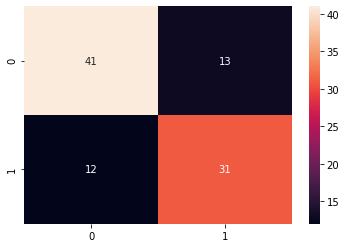

In [135]:
get_metrics(y_test, y_pred)

# Classifying a url of an image 

Enter a url: https://media.istockphoto.com/id/584226186/photo/green-apple.jpg?b=1&s=170667a&w=0&k=20&c=lDC_bfwsTi7_B_TdFClMNLUoYzVK331rOo_KECwby1U=
Apple


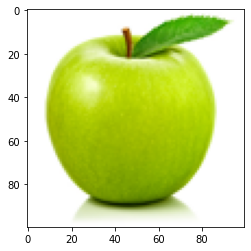

In [229]:
import requests
from PIL import Image

url = input("Enter a url: ")
image = Image.open(requests.get(url,stream=True).raw)
image = image.resize((100,100))
arr = np.asarray(image)/255
arr = arr.reshape(1,-1)
y_out = rf_random.predict(arr)
plt.imshow(image)

if y_out==1:
    print("Apple")
else:
    print("Tomato")